In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Simple Linear Regression

In [ ]:
#df=pd.read_csv("heart.csv")

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving heart (1).csv to heart (1) (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['heart (1).csv']))

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# X and Y need to be two-dimensional arrays of shape (n_samples, n_features) and (n_sample, n_targets) 

In [ ]:
heart_y = df["age"].to_numpy()
heart_y.shape

(303,)

In [ ]:
heart_y = heart_y.reshape((-1,1))
heart_y.shape

(303, 1)

In [ ]:
heart_X = df['chol'].to_numpy()
heart_X = heart_X.reshape((-1, 1))
heart_X.shape

(303, 1)

In [ ]:
type(heart_y)

numpy.ndarray

In [ ]:
# See slide on train/test dataset
#Train is generally 80 % of your dataset
#Test is generally 20 % of your dataset

In [ ]:
# Split the data into training/testing sets

heart_X_train = heart_X[:242]
heart_X_test = heart_X[242:]

In [ ]:
# Split the targets into training/testing sets

heart_y_train = heart_y[:242]
heart_y_test = heart_y[242:]

In [ ]:
heart_X_train.shape, heart_y_train.shape

((242, 1), (242, 1))

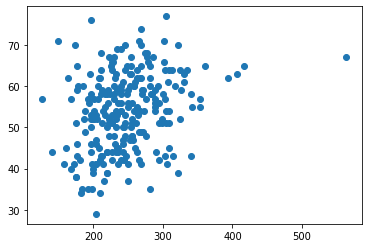

In [ ]:
plt.scatter(heart_X_train, heart_y_train)
plt.show()

In [ ]:
heart_X_test.shape, heart_X_train.shape

((61, 1), (242, 1))

In [ ]:
# Create linear regression object

regr = linear_model.LinearRegression()


In [ ]:
# Train the model using the training sets

regr.fit(heart_X_train, heart_y_train)

LinearRegression()

In [ ]:
heart_y_pred = regr.predict(heart_X_train)

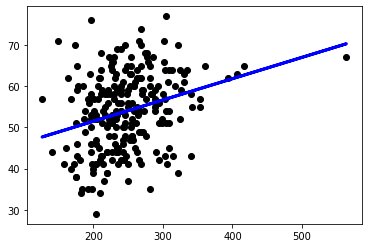

In [ ]:
plt.scatter(heart_X_train, heart_y_train,  color='black')
plt.plot(heart_X_train, heart_y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# Make predictions using the testing set

heart_y_pred = regr.predict(heart_X_test)

In [ ]:
# y = ax + b

In [ ]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(heart_y_test, heart_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(heart_y_test, heart_y_pred))

Coefficients: 
 [[0.05169721]]
Intercept: 
 [41.162605]
Mean squared error: 71.51
Coefficient of determination: -0.33


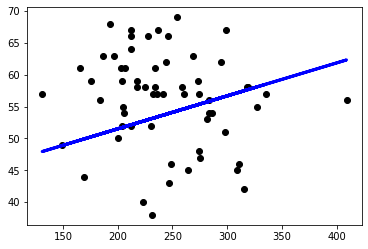

In [ ]:
# Plot outputs

plt.scatter(heart_X_test, heart_y_test,  color='black')
plt.plot(heart_X_test, heart_y_pred, color='blue', linewidth=3)

plt.show()


## Polynomial Regression

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

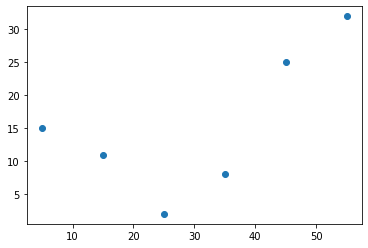

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
# degree can be greater than 2

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

In [ ]:
# Can replace the above three statements with
# x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [ ]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [ ]:
model = linear_model.LinearRegression()
model.fit(x_, y)

LinearRegression()

In [ ]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498563
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


In [ ]:
# y = ax^2 + bx + c

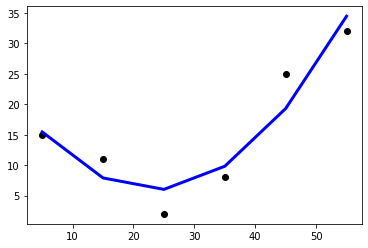

In [ ]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()

## Underfitting / Overfitting

In [ ]:
# Using linear fit for above example (Under-fitting)

regr.fit(x, y)

y_pred = regr.predict(x)

# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Coefficients: 
 [0.38]
Mean squared error: 61.47
Coefficient of determination: 0.41


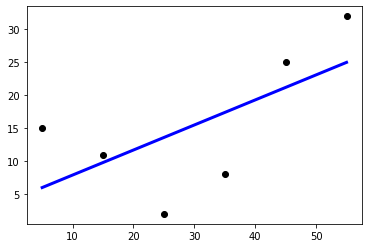

In [ ]:
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.show()

coefficient of determination: 1.0
intercept: 15.020359754533274
coefficients: [-2.54066431e-11 -2.47328299e-10 -3.40704263e-09 -3.95084163e-08
 -3.63619813e-07 -2.06682371e-06  2.01144641e-07 -7.26480195e-09
  1.15642163e-10 -6.83323029e-13]


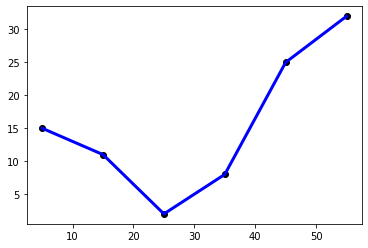

In [ ]:
# Over-fitting

x_ = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x)

model = linear_model.LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()


## Train/Test split to avoid under/over fitting

In [ ]:
transformer = PolynomialFeatures(degree=5, include_bias=False)

transformer.fit(heart_X_train)

PolynomialFeatures(degree=5, include_bias=False)

In [ ]:
heart_X_train_trans = transformer.transform(heart_X_train)

In [ ]:
heart_X_test_trans = transformer.transform(heart_X_test)

In [ ]:
model = linear_model.LinearRegression().fit(heart_X_train_trans, heart_y_train)

In [ ]:
heart_y_pred = model.predict(heart_X_test_trans)

In [ ]:
# The coefficients

print('Coefficients: \n', model.coef_)

# The mean squared error

print('Mean squared error of test: %.2f'
      % mean_squared_error(heart_y_test, heart_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination of test: %.2f'
      % r2_score(heart_y_test, heart_y_pred))

Coefficients: 
 [[-6.99138398e+00  4.90413832e-02 -1.63078079e-04  2.59006211e-07
  -1.57136137e-10]]
Mean squared error of test: 74.25
Coefficient of determination of test: -0.38


In [ ]:
mse_list_test = list()
mse_list_train = list()

for i in range(1, 15):
    transformer = PolynomialFeatures(degree=i, include_bias=False)
    transformer.fit(heart_X_train)
    heart_X_train_trans = transformer.transform(heart_X_train)
    heart_X_test_trans = transformer.transform(heart_X_test)
    model = linear_model.LinearRegression().fit(heart_X_train_trans, heart_y_train)
    heart_y_pred = model.predict(heart_X_test_trans)
    mse_list_test.append(mean_squared_error(heart_y_test, heart_y_pred))
    heart_y_pred = model.predict(heart_X_train_trans)
    mse_list_train.append(mean_squared_error(heart_y_train, heart_y_pred))

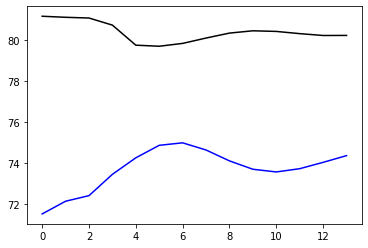

In [ ]:
plt.plot(mse_list_test, 'b')
plt.plot(mse_list_train, 'k')
plt.show()

In [ ]:
mse_list_test = np.array(mse_list_test)
np.argmin(mse_list_test)+1

1

In [ ]:
np.argmin([1,2,3])

0

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,
                                                  random_state=2)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_preds_lr=lr.predict(X_test)

In [ ]:

def prediction_calculator(n):
  for i in range(n):
      print("ENTER THE DETAILS FOR PERSON : ",(i+1))
      age_ip=int(input("\nEnter Age: "))
      sex_ip=int(input("\nIf Female Enter 0\nIf Male Enter 1 : "))
      print("\nValue 0: asymptomatic\nValue 1: atypical angina\nValue 2: non-anginal pain")
      cp_ip=int(input("\nEnter Chest Pain value (0/1/2) : "))
      trestbps_ip=int(input("\nEntert Resting Blood Pressure: "))
      chol_ip=int(input("\nEnter Cholestrol Value: "))
      print("\nThe person’s fasting blood sugar if greater than 120mg Enter 1 or 0 ")
      fbs_ip=int(input("\nEnter Fasting Blood Pressure value (0/1): "))
      print("\nresting electrocardiographic results\nValue 0: showing probable or definit")
      restecg_ip=int(input("\nEnter Resting Electrocardiographic value (0/1/2) : "))
      thalach_ip=int(input("\nEnter Max heart rate achieved : "))
      exang_ip=int(input("\nEnter Exercise induced angina : "))
      oldpeak_ip=float(input("\nEnter ST depression induced value : "))
      print("\nPerson's slope value\n0: downsloping\n1: flat\n2: upsloping")
      slope_ip=int(input("\nEnter slope value (0/1/2) : "))
      ca_ip=int(input("\nEnter number of major vessels (0-3) : "))
      print("\nThalassemia:\nValue 0: NULL\nValue 1: fixed defect\nValue 2: normal blood ")
      thal_ip=int(input("\nEnter Thalassemia Value: "))
 
      c=np.array([age_ip, sex_ip, cp_ip, trestbps_ip, chol_ip, fbs_ip, restecg_ip, thalach_ip,exang_ip, oldpeak_ip, slope_ip, ca_ip, thal_ip])
      c_rs=c.reshape(1,-1)
      pred = lr.predict(c_rs)
      if pred==1:
          print("\n\nHeart Diseased person Please Consult the Doctor!!")
      else:
          print("\n\nNo Heart Disease :)")
 
no_of_people=int(input("ENTER NUMBER OF PEOPLE : "))
prediction_calculator(no_of_people)


ENTER NUMBER OF PEOPLE : 1
ENTER THE DETAILS FOR PERSON :  1

Enter Age: 66

If Female Enter 0
If Male Enter 1 : 1

Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain

Enter Chest Pain value (0/1/2) : 0

Entert Resting Blood Pressure: 112

Enter Cholestrol Value: 212

The person’s fasting blood sugar if greater than 120mg Enter 1 or 0 

Enter Fasting Blood Pressure value (0/1): 0

resting electrocardiographic results
Value 0: showing probable or definit

Enter Resting Electrocardiographic value (0/1/2) : 0

Enter Max heart rate achieved : 132

Enter Exercise induced angina : 1

Enter ST depression induced value : 0.1

Person's slope value
0: downsloping
1: flat
2: upsloping

Enter slope value (0/1/2) : 2

Enter number of major vessels (0-3) : 1

Thalassemia:
Value 0: NULL
Value 1: fixed defect
Value 2: normal blood 

Enter Thalassemia Value: 2


No Heart Disease :)


In [ ]:
1
1

1